In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Perceptron class Implementation using pytorch
***

In [3]:
class Perceptron( nn.Module):
    """
    Implementation of a perceptron with one linear layer
    """
    def __init__( self, input_dim ):
        super( Perceptron, self).__init__()
        self.fc1 = nn.Linear( input_dim, 1 )
        
    def forward( self, x_in ):
        """
        Implement the forward pass for a perceptron
        """
        return torch.sigmoid( self.fc1( x_in ) ).squeeze()

# Activation Functions
***
A tour of some nonlinear activation functions.
## Sigmoid
***
The sigmoid function saturates (produces extreme valued outputs) very quickly for a majority of inputs. This becomes a problem because it can lead to the gradients becoming either zero or diverging to an overflowing floating-point value.

Thus, the sigmoid is susceptible to the **vanishing gradient problem** and the **exploding gradient problem**. 

As a result, it is rare to see sigmoid units in neural networks other than at the end where the squashing property allows one to interpret outputs as probabilities. 

$$f(x) = \frac{1}{1+e^{-x}}$$

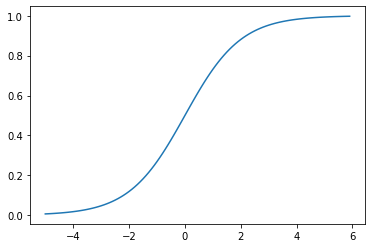

In [6]:
x = torch.arange(-5., 6., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

## Tanh
***
$$f(x) = \tanh(x)=\frac{{e^x}-e^{-x}}{e^{x}+e^{-x}}$$
This function also has the same squashing property, except that it maps the set of real values from $(-\infty, \infty)$ to the range $[-1,+1]$. 

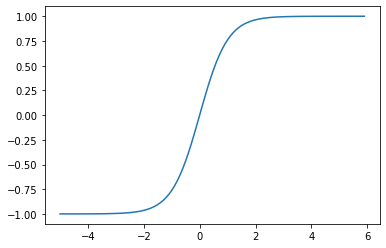

In [7]:
y = torch.tanh(x)
plt.plot( x.numpy(), y.numpy())
plt.show()

# ReLU
***
ReLU stands for rectified linear unit. This is arguably the most important of the activation functions. 

$$f(x) = \max(0,x)$$

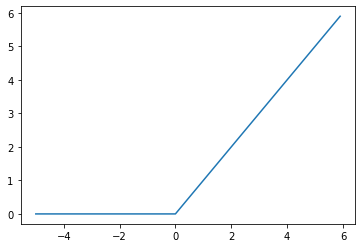

In [8]:
relu = torch.nn.ReLU()
y = relu(x)

plt.plot(x.numpy(), y.numpy())
plt.show()

## Softmax
***
Softmax squashes the output of each unit to be between 0 and 1, and it also normalizes each of the outputs by the sum of all the outputs, so we can interpret the result of softmax as a probability. 

$$\textrm{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^k e^{x_j}}$$

Usually this is paired with a probabilistic training objective such as categorical cross entropy. 

In [9]:
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output,dim=1))

tensor([[-2.2896, -0.1867, -0.0454]])
tensor([[0.0537, 0.4398, 0.5065]])
tensor([1.])
